<a href="https://colab.research.google.com/github/Signorte/colab_MLDL_HandsOn/blob/master/%E7%AC%AC%E4%BA%8C%E5%9B%9E%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%8F%E3%83%B3%E3%82%BA%E3%82%AA%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 準備

Jupyterのショートカット
```
Ctrl + Enter: セルの実行
Shift + Enter: セルの実行+下のセルに移動(無い場合は新しいセルを作成)
```

スタンフォード大学のData Science講座[CS109](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)で使うデータを使用します

In [0]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2019-11-12 03:10:23--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.08s   

2019-11-12 03:10:23 (530 KB/s) - ‘titanic.csv’ saved [44225/44225]



可視化用のライブラリをインストール

In [0]:
!pip install dtreeviz
!pip install eli5

  Created wheel for dtreeviz: filename=dtreeviz-0.7.1-cp36-none-any.whl size=20264 sha256=d88417bae7e9fead81fb3e1a025babbb3a1be4b8b26ad1b0f7365fbcf7ea4e19
  Stored in directory: /root/.cache/pip/wheels/1a/de/95/59b4de6e236db6acc37856d122cff2d3414ed09f99564ba9c1
Successfully built dtreeviz
     |████████████████████████████████| 112kB 3.5MB/s 


使用するライブラリをまとめてimportします

In [0]:
# 変数コピー
import copy

# 数理計算
import numpy as np

# csv読み込み
import pandas as pd

# 可視化系
from matplotlib import pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn import tree
from dtreeviz.trees import dtreeviz
plt.style.use("fivethirtyeight")
sns.set()

# データ分割
from sklearn.model_selection import train_test_split

# 評価指標計算
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# 機械学習モデル
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# 特徴量の重要度を出す
import eli5
from eli5.sklearn import PermutationImportance

# 応用問題のデータ
import statsmodels.api as sm

Using TensorFlow backend.


## 1.第一回の復習

##### 問題1

pandasでtitanic.csvを読み込んでtitanic_dataに代入
しましょう

`.head(N)`は先頭N行を返すメソッドです
ここでは先頭３行を表示します

In [0]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


##### 解答

In [0]:
titanic_data = pd.read_csv("titanic.csv")  # データの読み込み
titanic_data.head(3)

##### 問題2

titanic_dataが何行何列のデータか確認してみましょう

In [0]:
print(titanic_data.shape)

(887, 8)


##### 解答

In [0]:
titanic_data.shape

##### 問題3

男性と女性の人数を知りたいです

titanic_data内の男性と女性の人数を表示して下さい

In [0]:
titanic_data["Sex"].value_counts()

male      573
female    314
Name: Sex, dtype: int64

##### 解答

In [0]:
titanic_data["Sex"].value_counts()

##### 問題4

問題3で出した男性と女声の割合を円グラフで表示してください


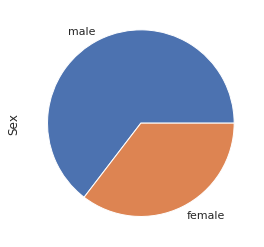

In [0]:
titanic_data["Sex"].value_counts().plot.pie()

##### 解答

In [0]:
titanic_data["Sex"].value_counts().plot.pie()

##### 問題5

年齢の分布を知りたいです

titanic_data内の年齢のヒストグラムを表示してください

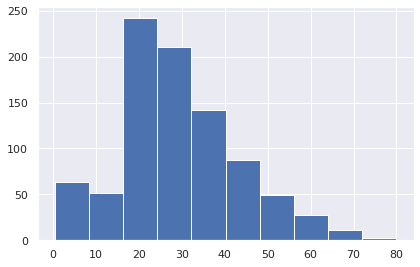

In [0]:
# titanic_data["Age"].value_counts().plot.hist() だめ
titanic_data["Age"].hist()

##### 解答

In [0]:
titanic_data["Age"].hist()

##### 問題6

船室のクラス(Pclass)が生き残るかどうか(Survived)に影響するか可視化したいです

生き残るかどうかと船室のクラスの関係を可視化して下さい

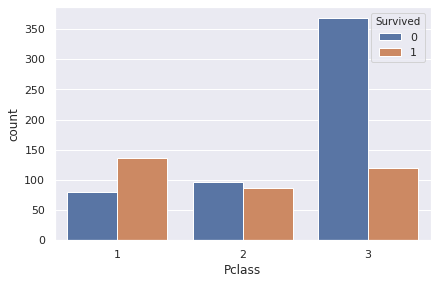

In [0]:
sns.countplot(hue='Survived', x="Pclass", data=titanic_data)

##### ヒント

In [0]:
# 可視化にはsns.countplotが使えます
# hueに集計する列名、xに系列、dataにtitanic_dataを入れます

##### 解答

In [0]:
sns.countplot(hue='Survived', x="Pclass", data=titanic_data)

##### 問題7

学習をする前に性別を数字で表現したいです
`Sex`列のmaleを0に、femaleを1にした`SexCate`列を追加して下さい

In [0]:
def to_cate(x):
  if x == "male":
    return 0
  else:
    return 1

titanic_data['SexCate'] = titanic_data['Sex'].map(to_cate)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCate
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


##### ヒント

In [0]:
# まずは入力がmaleなら0、それ以外なら1を返す to_cate 関数を作りましょう

##### ヒント

In [0]:
# .mapメソッドを使うことですべての要素に関数を適用することができます

##### 解答

In [0]:
def to_cate(x):
  if x == "male":
    return 0
  else:
    return 1

titanic_data['SexCate'] = titanic_data['Sex'].map(to_cate)
titanic_data.head()

##### 問題8

ロジスティック回帰を使ってtitanic_dataを学習したいです

なお、titanic_dataは以下のように分割されています
- x_train: 学習用データの特徴量
- x_test: テスト用データの特徴量
- y_train: 学習用データの正解データ
- y_test: テスト用データの正解データ

In [0]:
train, test = train_test_split(titanic_data, test_size=0.3, random_state=0)

use_feature = ["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "SexCate"]  # 使用する特徴量

x_train = train[use_feature]
x_test = test[use_feature]
y_train = train["Survived"]
y_test = test["Survived"]

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### 解答

In [0]:
train, test = train_test_split(titanic_data, test_size=0.3, random_state=0)

use_feature = ["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "SexCate"]  # 使用する特徴量

x_train = train[use_feature]
x_test = test[use_feature]
y_train = train["Survived"]
y_test = test["Survived"]

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

##### 問題9

テスト用データを予測して、学習したモデルの精度がどのくらいか確認してみて下さい

In [0]:
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.797752808988764

##### ヒント

In [0]:
# 精度を計算するにはaccuracy_score関数が使えます

##### 解答

In [0]:
pred = model.predict(x_test)
accuracy_score(y_test, pred)

##### 問題10

自分の情報を入力して生存確率を予測してみましょう

自分のデータは各変数に入力することでyour_dataに格納されます

In [0]:
pclass = 3
age = 33
siblings = 0
parents = 0
fare = 10
sex = 0

your_data = pd.DataFrame({
    "Pclass": [pclass],
    "Age": [age],
    "Siblings/Spouses Aboard": [siblings],
    "Parents/Children Aboard": [parents],
    "Fare": [fare],
    "SexCate": [sex],
})

display(your_data)

pred = model.predict_proba(your_data)
pred

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCate
0,3,33,0,0,10,0


array([[0.90659683, 0.09340317]])

##### 解答

In [0]:
pclass = 3
age = 29
siblings = 0
parents = 0
fare = 10
sex = 0

your_data = pd.DataFrame({
    "Pclass": [pclass],
    "Age": [age],
    "Siblings/Spouses Aboard": [siblings],
    "Parents/Children Aboard": [parents],
    "Fare": [fare],
    "SexCate": [sex],
})

display(your_data)

pred = model.predict_proba(your_data)
pred

# 2. 学習しているものの可視化

## 2.1 ロジスティック回帰を詳しく見てみる

ちょっとtitanicは扱いにくいので別のデータを使います

政府統計の総合窓口e-statで公開されている消費者物価地域差指数から必要なデータを抽出したもので、予測対象として平成27年の国勢調査時に定められた大都市圏を追加しています。

こちらのサイトからいただきました
[Pythonで学ぶ 基礎からの機械学習入門](https://news.mynavi.jp/series/Python_ML)

In [0]:
!wget http://news.mynavi.jp/series/Python_ML/005/resources/consumerPrices_tree.csv

--2019-11-12 03:26:17--  http://news.mynavi.jp/series/Python_ML/005/resources/consumerPrices_tree.csv
Resolving news.mynavi.jp (news.mynavi.jp)... 13.225.212.48, 13.225.212.98, 13.225.212.29, ...
Connecting to news.mynavi.jp (news.mynavi.jp)|13.225.212.48|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://news.mynavi.jp/series/Python_ML/005/resources/consumerPrices_tree.csv [following]
--2019-11-12 03:26:17--  https://news.mynavi.jp/series/Python_ML/005/resources/consumerPrices_tree.csv
Connecting to news.mynavi.jp (news.mynavi.jp)|13.225.212.48|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://news.mynavi.jp/article/Python_ML-5/resources/consumerPrices_tree.csv [following]
--2019-11-12 03:26:17--  https://news.mynavi.jp/article/Python_ML-5/resources/consumerPrices_tree.csv
Reusing existing connection to news.mynavi.jp:443.
HTTP request sent, awaiting response... 200 OK
Length: 3255 (3.2K) [

In [0]:
!ls

consumerPrices_tree.csv  sample_data  titanic.csv


In [0]:
city_data = pd.read_csv("consumerPrices_tree.csv")  # ダウンロードしたcsvデータを読み込み
city_data.head()

,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費,大都市圏分類
0,北 海 道,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9,1
1,青 森 県,97.4,95.7,109.0,96.2,97.1,101.0,100.5,93.2,96.4,97.8,0
2,岩 手 県,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0,0
3,宮 城 県,97.2,97.1,101.3,104.0,95.6,100.9,97.5,99.5,99.3,99.2,1
4,秋 田 県,97.3,86.1,107.2,103.1,102.4,98.9,98.0,87.1,98.0,100.2,0


##### 演習1

データを`都道府県` `保険医療` `教養娯楽` `大都市圏分類`の4列に絞ってみましょう

In [0]:
city_data = city_data[["都道府県", "保険医療", "教養娯楽", "大都市圏分類"]]
city_data.head()

,都道府県,保険医療,教養娯楽,大都市圏分類
0,北 海 道,100.2,97.1,1
1,青 森 県,101.0,96.4,0
2,岩 手 県,100.4,99.8,0
3,宮 城 県,100.9,99.3,1
4,秋 田 県,98.9,98.0,0


##### 解答

In [0]:
city_data = city_data[["都道府県", "保険医療", "教養娯楽", "大都市圏分類"]]
city_data.head()

##### カラム名を修正(Colaboratoryの日本語表示設定が少し面倒なため)

In [0]:
city_data.columns = ["Name", "Medical", "Culture", "BigCity"]
city_data.head()

,Name,Medical,Culture,BigCity
0,北 海 道,100.2,97.1,1
1,青 森 県,101.0,96.4,0
2,岩 手 県,100.4,99.8,0
3,宮 城 県,100.9,99.3,1
4,秋 田 県,98.9,98.0,0


データの色を定義する(BigCityなら赤、そうじゃないなら青)

In [0]:
color_data = city_data["BigCity"].map({0:"b",1:"r"})
color_data.head()

0    r
1    b
2    b
3    r
4    b
Name: BigCity, dtype: object

どんなデータか見てみる

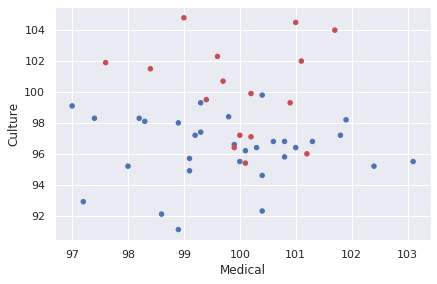

In [0]:
city_data.plot.scatter(x='Medical', y='Culture', c=color_data)

##### 演習2
ロジスティック回帰で学習をしてみましょう

In [0]:
X = city_data[["Medical", "Culture"]]
y = city_data["BigCity"]
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### 解答

In [0]:
X = city_data[["Medical", "Culture"]]
y = city_data["BigCity"]

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X, y)

##### 演習3
学習した重みと切片を表示して下さい

重みは`W`、切片は`b`に代入して下さい

In [0]:
# 重み
W = lr_model.coef_

# 切片
b = lr_model.intercept_

print(f" 重み: {W}")
print(f" 切片: {b}")

 重み: [[-0.39738028  0.39870658]]
 切片: [-0.08503612]


##### ヒント

In [0]:
# coef_とintercept_をつかいます

##### 解答

In [0]:
# 重み
W = lr_model.coef_

# 切片
b = lr_model.intercept_

print(f" 重み: {W}")
print(f" 切片: {b}")

##### 分類の境界線を可視化する関数

In [0]:
def plot_decision_regions(model):
  h = 0.02
  
  x_min = city_data["Medical"].min() - 1
  x_max = city_data["Medical"].max() + 1
  y_min=city_data["Culture"].min() - 1
  y_max =city_data["Culture"].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
    
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
  plt.scatter(city_data["Medical"], city_data["Culture"], c=color_data, cmap=plt.cm.Dark2)
    
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

分類境界面を可視化してみる

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


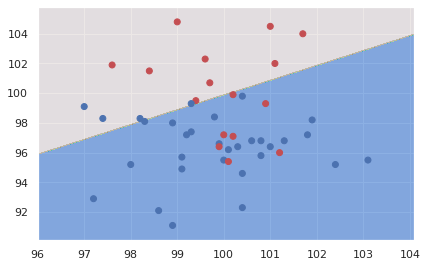

In [0]:
plot_decision_regions(lr_model)

ロジスティック回帰は

$y = Medical * w_1+ Culture *  w_2 + b$

$f = sigmoid$ (値を0~1に均す関数だと思ってもらえれば良い)

のとき$f(y)$が0.5以上なら$BigCity=1$、以下なら$BigCity=0$となるように学習する

学習を回す最大回数をmax_iterで調整できる

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


1 [[-0.00325977 -0.0030199 ]] [-3.27395797e-05]


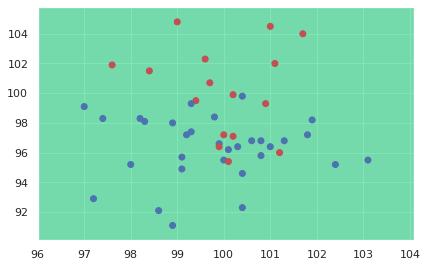

In [0]:
lr_model = LogisticRegression(random_state=0, max_iter=1)
lr_model.fit(X, y)
print(1, lr_model.coef_, lr_model.intercept_)
plot_decision_regions(lr_model)

1周しか回さないと学習が足りない

4周くらい回してみる

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


4 [[-0.06971748  0.06457161]] [-0.00078858]


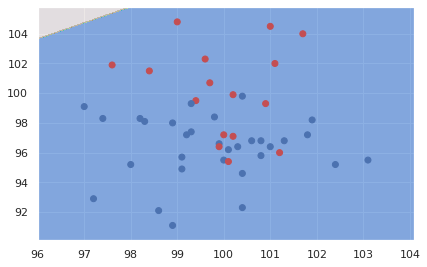

In [0]:
lr_model = LogisticRegression(random_state=0, max_iter=4)
lr_model.fit(X, y)
print(4, lr_model.coef_, lr_model.intercept_)
plot_decision_regions(lr_model)

境界線っぽいものが見えてくる

さらに10周回してみる

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


10 [[-0.39738028  0.39870658]] [-0.08503612]


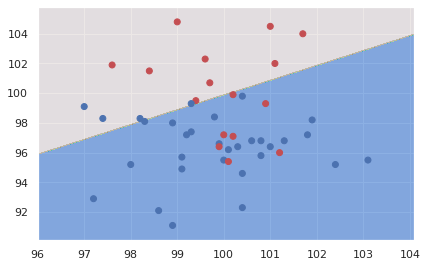

In [0]:
lr_model = LogisticRegression(random_state=0, max_iter=10)
lr_model.fit(X, y)
print(10, lr_model.coef_, lr_model.intercept_)
plot_decision_regions(lr_model)

10周以降の重みと切片の変化を見てみる

In [0]:
for i in range(10):
  lr_model = LogisticRegression(random_state=0, max_iter=10+i)
  lr_model.fit(X, y)
  print(10+i, lr_model.coef_, lr_model.intercept_)

10 [[-0.39738028  0.39870658]] [-0.08503612]
11 [[-0.39738028  0.39870658]] [-0.08503612]
12 [[-0.39738028  0.39870658]] [-0.08503612]
13 [[-0.39738028  0.39870658]] [-0.08503612]
14 [[-0.39738028  0.39870658]] [-0.08503612]
15 [[-0.39738028  0.39870658]] [-0.08503612]
16 [[-0.39738028  0.39870658]] [-0.08503612]
17 [[-0.39738028  0.39870658]] [-0.08503612]
18 [[-0.39738028  0.39870658]] [-0.08503612]
19 [[-0.39738028  0.39870658]] [-0.08503612]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

あまり変わらない

sklearnのライブラリだとデフォルト100に設定されているので通常は気にしなくてよい

## 2.2 決定木の境界面の確認を通して過学習について確認する

決定木の学習

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


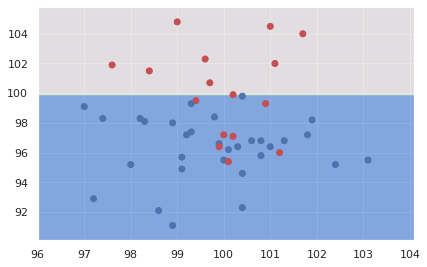

In [0]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=1)
tree_model.fit(X, y)
plot_decision_regions(tree_model)

木構造を可視化する関数

In [0]:
def plot_tree_graph1(tree_model):
  dot_data = tree.export_graphviz(
    tree_model,
    out_file=None,
    feature_names=["Medical", "Culture"],
    class_names=["Not BigCity", "BigCity"],
    filled=True,
    proportion=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  return Image(graph.create_png())
  
def plot_tree_graph2(tree_model):
  viz = dtreeviz(
    tree_model,
    X, 
    y,
    target_name='BigCity',
    feature_names=["Medical", "Culture"],
    class_names=["Medical", "Culture"],
  ) 
  display(viz)

木構造を可視化してみる

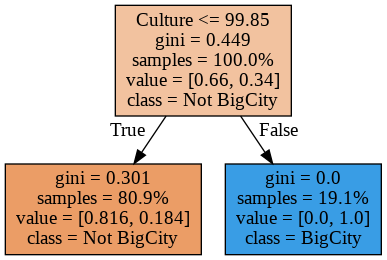

In [0]:
plot_tree_graph1(tree_model)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


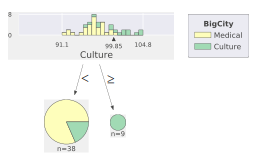

In [0]:
plot_tree_graph2(tree_model)

##### 演習3

決定木の`max_depth`を操作して木を深くすると、分類境界がどのように変化するか見てみましょう

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


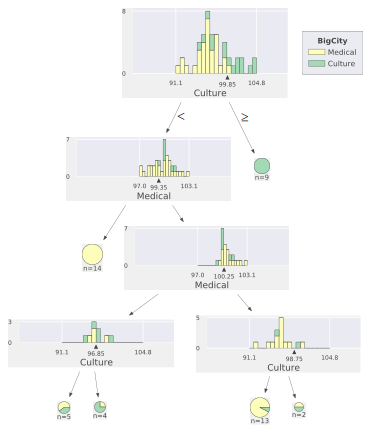

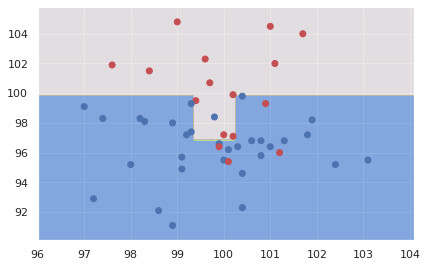

In [0]:
max_depth = 4

tree_model = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
tree_model.fit(X, y)

plot_decision_regions(tree_model)
plot_tree_graph2(tree_model)

##### 解答

In [0]:
max_depth = 2

tree_model = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
tree_model.fit(X, y)

plot_decision_regions(tree_model)
plot_tree_graph2(tree_model)

##### 演習4

どんなときに過学習が起こると思いますか？

##### 解答

In [0]:
# 解く問題に対して、学習器が複雑すぎるとき

### 2.3 過学習を確認する

In [0]:
train, test = train_test_split(city_data, test_size=0.4, random_state=0)
x_train = train[["Medical", "Culture"]]
x_test = test[["Medical", "Culture"]]
y_train = train["BigCity"]
y_test = test["BigCity"]

In [0]:
for max_depth in range(1, 6):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
  tree_model.fit(x_train, y_train)
  pred_train = tree_model.predict(x_train)
  pred_test = tree_model.predict(x_test)
  acc_train = accuracy_score(y_train, pred_train)
  acc_test = accuracy_score(y_test, pred_test)
  print(f"max_depth: {max_depth}, train: {acc_train}, test: {acc_test}")

max_depth: 1, train: 0.9285714285714286, test: 0.7368421052631579
max_depth: 2, train: 0.9285714285714286, test: 0.7368421052631579
max_depth: 3, train: 1.0, test: 0.631578947368421
max_depth: 4, train: 1.0, test: 0.631578947368421
max_depth: 5, train: 1.0, test: 0.631578947368421


testのスコアが落ちたmax_depth=3の決定境界を見てみる

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


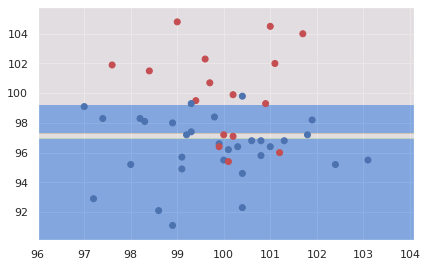

In [0]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=3)
tree_model.fit(x_train, y_train)
plot_decision_regions(tree_model)

不自然な境界面ができてしまっている

直前のmax_depth=2を見てみる

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


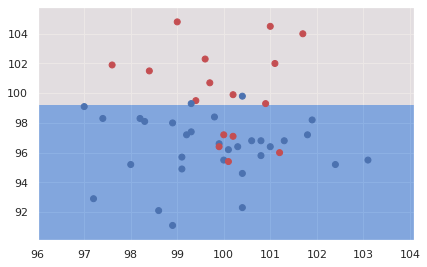

In [0]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_model.fit(x_train, y_train)
plot_decision_regions(tree_model)

#### (参考)

SVMの過学習をみてみる

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


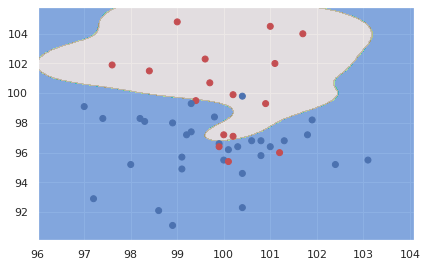

In [0]:
svm_model = svm.SVC(kernel="rbf", C=10, gamma=0.5, random_state=0)
svm_model.fit(X, y)
plot_decision_regions(svm_model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: linewidths is ignored by contourf
  


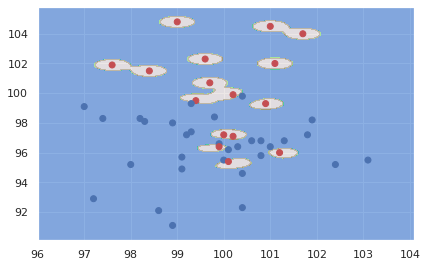

In [0]:
svm_model = svm.SVC(kernel="rbf", C=10, gamma=10, random_state=0)
svm_model.fit(X, y)
plot_decision_regions(svm_model)

### 2.4 学習データを増やしていき、過学習を確認する

確認するにはデータの数が少ないので再びtitanicのデータを使う


In [0]:
train, test = train_test_split(titanic_data, test_size=0.3, random_state=0)

use_feature = ["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "SexCate"]  # 使用する特徴量

x_train = train[use_feature]
x_test = test[use_feature]
y_train = train["Survived"]
y_test = test["Survived"]

学習データを増やしていき、精度を確認する

横軸に学習データ数、縦軸に精度をとったグラフを描画する関数

In [0]:
def plot_tree_accuracy_graph(max_depth):
  results = []
  for n_data in range(10, 600, 5):
    model = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    model.fit(x_train.head(n_data), y_train.head(n_data))
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    results.append((n_data, acc_train, acc_test))

  result_df = pd.DataFrame(results, columns=["n_data", "train", "test"])
  result_df.index = result_df.n_data

  result_df[["train", "test"]].plot(ylim=(0.65, 1.))

max_depth=1

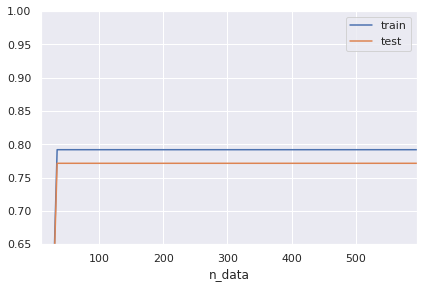

In [0]:
plot_tree_accuracy_graph(1)

testどころかtrainも増えていない  
こういったものを未学習(問題に対して学習器がシンプル過ぎる)という


max_depth=4

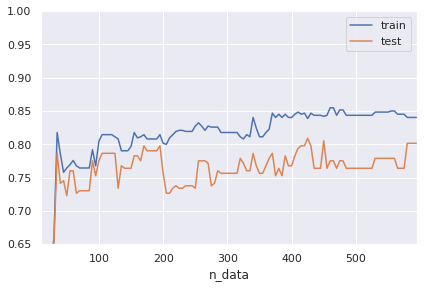

In [0]:
plot_tree_accuracy_graph(4)

max_depth=100  
過学習を起こす

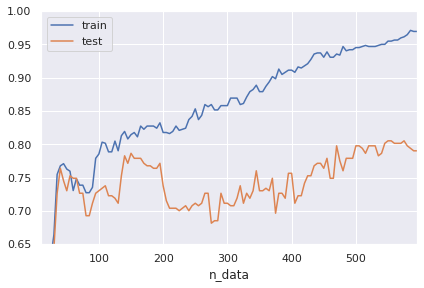

In [0]:
plot_tree_accuracy_graph(100)

#### K-FOLD Cross Validation

# 3. 精度を上げるために

##### 演習4

学習データ、テストデータを引数に取るとロジスティック回帰の学習を行い精度を表示する関数
 `train_and_test` を作って下さい

In [0]:
def train_and_test(x_train, y_train, x_test, y_test):
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    print(f"train: {acc_train} / test: {acc_test}")

##### 解答

In [0]:
def train_and_test(x_train, y_train, x_test, y_test):
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    print(f"train: {acc_train} / test: {acc_test}")

##### 予測を試してみる

In [0]:
train_and_test(x_train, y_train, x_test, y_test)

train: 0.8032258064516129 / test: 0.797752808988764


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 3.1 新しい特徴を作ってみる

年齢に着目

In [0]:
titanic_data["CategoricalAge"] = pd.cut(titanic_data['Age'], 10)  # 10区間に分割
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCate,CategoricalAge
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,"(16.336, 24.294]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,"(32.252, 40.21]"
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,"(24.294, 32.252]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,"(32.252, 40.21]"
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,"(32.252, 40.21]"


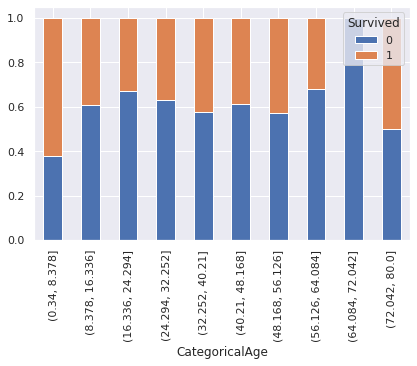

In [0]:
pd.crosstab(titanic_data['CategoricalAge'], titanic_data['Survived'], normalize='index').plot.bar(stacked=True)

子供か否かの `isChild` 特徴量を追加する

In [0]:
x_train_2 = copy.deepcopy(x_train)
x_test_2 = copy.deepcopy(x_test)

In [0]:
x_train_2["isChild"] = (x_train['Age'] < 10).astype(int)
x_train_2.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCate,isChild
350,3,15.0,1,1,7.2292,0,0
124,3,12.0,1,0,11.2417,0,0
577,2,25.0,1,1,30.0000,1,0
422,3,54.0,0,0,7.2500,0,0
118,3,2.0,4,2,31.2750,1,1


In [0]:
x_test_2["isChild"] = (x_test['Age'] < 10).astype(int)
x_test_2.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCate,isChild
14,3,14.0,0,0,7.8542,1,0
158,3,5.0,8,2,69.5500,0,1
762,1,46.0,0,0,39.6000,0,0
740,3,31.0,0,0,7.9250,0,0
482,3,8.0,3,1,25.4667,1,1


In [0]:
train_and_test(x_train_2, y_train, x_test_2, y_test)

train: 0.8145161290322581 / test: 0.8127340823970037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


元の精度が `test: 0.797752808988764`  だったので精度が上がっている

##### 同行者に着目する



In [0]:
x_train_3 = copy.deepcopy(x_train)
x_test_3 = copy.deepcopy(x_test)

##### 演習5

同行者がいるかいないかの特徴 `isAlone` を追加してみて下さい
(pandasの書き方になれてないと難しいです)

In [0]:
x_train_3["isAlone"] = (x_train.apply(lambda x: x["Siblings/Spouses Aboard"]+x["Parents/Children Aboard"], axis=1) == 0).astype(int)
x_train_3.head()

x_test_3["isAlone"] = (x_test.apply(lambda x: x["Siblings/Spouses Aboard"]+x["Parents/Children Aboard"], axis=1) ==0).astype(int)
x_test_3.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCate,isAlone
14,3,14.0,0,0,7.8542,1,1
158,3,5.0,8,2,69.5500,0,0
762,1,46.0,0,0,39.6000,0,1
740,3,31.0,0,0,7.9250,0,1
482,3,8.0,3,1,25.4667,1,0


##### 解答

In [0]:
x_train_3["isAlone"] = (x_train.apply(lambda x: x["Siblings/Spouses Aboard"]+x["Parents/Children Aboard"], axis=1) == 0).astype(int)
x_train_3.head()

In [0]:
x_test_3["isAlone"] = (x_test.apply(lambda x: x["Siblings/Spouses Aboard"]+x["Parents/Children Aboard"], axis=1) ==0).astype(int)
x_test_3.head()

##### isAloneを追加したデータで学習

In [0]:
train_and_test(x_train_3, y_train, x_test_3, y_test)

train: 0.8048387096774193 / test: 0.7902621722846442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


元の精度が test: `0.797752808988764` だったので精度が下がってがっている

## 3.2 モデルがどの特徴から学習したのかを可視化する

In [0]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
perm = PermutationImportance(lr_model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=use_feature)

Weight,Feature
0.2180 ± 0.0343,SexCate
0.0607 ± 0.0257,Pclass
0.0270 ± 0.0308,Age
0.0150 ± 0.0067,Siblings/Spouses Aboard
0.0082 ± 0.0030,Parents/Children Aboard
0.0045 ± 0.0056,Fare


`isChild`を追加

In [0]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train_2, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
perm = PermutationImportance(lr_model).fit(x_test_2, y_test)
eli5.show_weights(perm, feature_names=use_feature + ["isChild"])

Weight,Feature
0.2240 ± 0.0587,SexCate
0.0517 ± 0.0145,Pclass
0.0315 ± 0.0154,Age
0.0195 ± 0.0129,Siblings/Spouses Aboard
0.0105 ± 0.0099,Fare
0.0075 ± 0.0106,Parents/Children Aboard
0.0037 ± 0.0150,isChild


##### 演習5
isChildと同様にisAloneも`PermutationImportance`を使った可視化をしてみる

In [0]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train_3, y_train)

perm = PermutationImportance(lr_model).fit(x_test_3, y_test)
eli5.show_weights(perm, feature_names=use_feature + ["isAlone"])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Weight,Feature
0.2165 ± 0.0539,SexCate
0.0262 ± 0.0177,Pclass
0.0157 ± 0.0173,Siblings/Spouses Aboard
0.0075 ± 0.0047,Fare
0.0067 ± 0.0229,Age
-0.0045 ± 0.0056,Parents/Children Aboard
-0.0142 ± 0.0087,isAlone


##### 解答

In [0]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train_3, y_train)

perm = PermutationImportance(lr_model).fit(x_test_3, y_test)
eli5.show_weights(perm, feature_names=use_feature + ["isAlone"])

# 4 複数の評価指標を使ってみる

In [0]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train, y_train)

pred_test = lr_model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


　混同行列を作成する

In [0]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[141,  21],
       [ 33,  72]])

In [0]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(141, 21, 33, 72)

AI Shiftの資料と異なり

||Negative(予測)|Positive(予測)|
|:--|:--:|:--:|
|Negative(正解)|TN|FP|
|Positive(正解)|FN|TP|

となっていることに注意

Precision, Recallを計算する

In [0]:
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, pred_test)

precision  
[Negativeのprecision, Positiveのprecision]

In [0]:
precision

array([0.81034483, 0.77419355])

##### 演習6

PositiveのPrecisionを混同行列を見て計算してみましょう

In [0]:
72/(72+21)

0.7741935483870968

##### ヒント

In [0]:
# PositiveのPrecisionは TP / (TP + FP) で計算されます

##### 正解

In [0]:
72/(72+21)

##### recall  
[Negativeのrecall, Positiveのrecall]

In [0]:
recall

##### 演習6
PositiveのRecallを混同行列を見て計算してみましょう

In [0]:
72/(72+33)

0.6857142857142857

##### ヒント

In [0]:
# PositiveのRecallは TP / (TP + FN) で計算されます

##### 正解

In [0]:
72/(72 + 33)

##### F値
[NegativeのF値, PositiveのF値]

In [0]:
fbeta_score

array([0.83928571, 0.72727273])

データ数  
[Negativeの個数, Positiveの個数]

In [0]:
support
# the number of negative and positive

array([162, 105])

# 5. 応用問題

不倫危険度フラグ予測問題を説く
モデルを自分なりに構築してみましょう


##### データ読み込み

In [0]:
furin_data = sm.datasets.fair.load_pandas().data # 不倫データのロード
furin_data.affairs  = (furin_data.affairs > 0).astype(int)  # 不倫フラグを0/1に変換
print(furin_data.shape)
furin_data.head()

(6366, 9)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


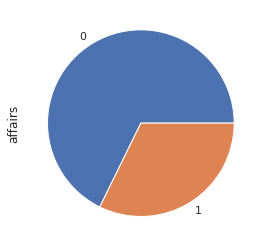

In [0]:
  furin_data.affairs.value_counts().plot.pie()

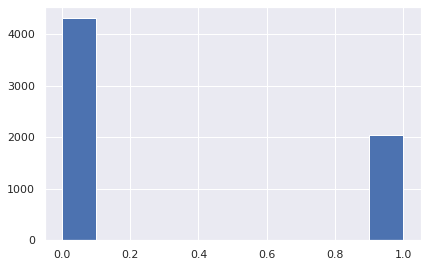

In [0]:
furin_data.affairs.hist()

In [0]:
train, test = train_test_split(furin_data, test_size=0.3, random_state=0)

use_feature = ["rate_marriage", "age", "yrs_married", "children", "religious", "educ", "occupation", "occupation_husb"]  # 使用する特徴量

x_train_f = train[use_feature]
x_test_f = test[use_feature]
y_train_f = train["affairs"]
y_test_f = test["affairs"]

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = model.predict(x_test_f, y_test_f)